In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dados = [[1980,30,68],[1990,43,109],[2000,62,141],
         [2010,74,180],[2019,91,207]]
df_funcionarios = pd.DataFrame(dados,columns=['Ano',
                                              'Mulheres',
                                              'Homens'])
df_funcionarios['Total'] = df_funcionarios.iloc[:,1:3].sum(axis=1)
df_funcionarios.set_index('Ano', inplace=True)

In [5]:
df_funcionarios.head()

,Mulheres,Homens,Total
Ano,,,
1980,30,68,98
1990,43,109,152
2000,62,141,203
2010,74,180,254
2019,91,207,298


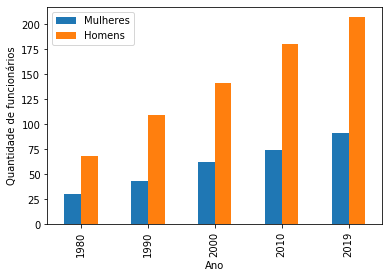

In [6]:
df_funcionarios.iloc[:,0:2].plot(kind='bar')
plt.ylabel('Quantidade de funcionários')
plt.show()

In [7]:
# Criando a tabela com a porcentagem
df_funcaPorcentagem = df_funcionarios.copy()
df_funcaPorcentagem['Mulheres'] = df_funcionarios['Mulheres']/df_funcionarios['Total'] * 100
df_funcaPorcentagem['Homens'] = df_funcionarios['Homens']/df_funcionarios['Total'] * 100
df_funcaPorcentagem.drop(columns=['Total'], inplace=True)
df_funcaPorcentagem.head()

,Mulheres,Homens
Ano,,
1980,30.612245,69.387755
1990,28.289474,71.710526
2000,30.541872,69.458128
2010,29.133858,70.866142
2019,30.536913,69.463087


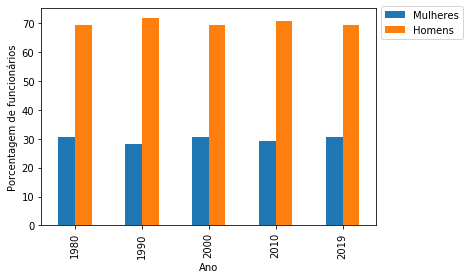

In [8]:
ax = df_funcaPorcentagem.plot(kind='bar')
ax.legend(bbox_to_anchor=(1, 1.03))
plt.ylabel('Porcentagem de funcionários')
plt.show()

In [9]:
dados = []
df_diff = pd.DataFrame(dados,columns=['Ano','Mulheres','Homens'])

tamanho = df_funcionarios.shape[0];
i = 1;
anos = list(df_funcionarios.index.values);

while i < tamanho:
    ano = str(anos[i-1]) + ' - ' + str(anos[i])
    mulheres = df_funcionarios.iloc[i,0] - df_funcionarios.iloc[i-1, 0]
    homens = df_funcionarios.iloc[i,1] - df_funcionarios.iloc[i-1, 1]
    df_diff = df_diff.append({'Ano':ano,'Mulheres': mulheres, 'Homens':homens}, ignore_index=True)
    i+=1
df_diff.set_index('Ano', inplace=True)


df_diff.head()

,Mulheres,Homens
Ano,,
1980 - 1990,13,41
1990 - 2000,19,32
2000 - 2010,12,39
2010 - 2019,17,27


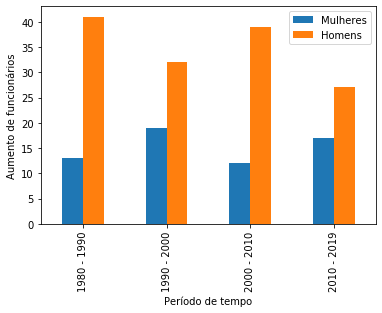

In [11]:
df_diff.plot(kind='bar')
plt.ylabel('Aumento de funcionários')
plt.xlabel('Período de tempo')
plt.show()